<h3> <b>Image Compression using K-means clustering Algorithm

*1. Importing the necessary libraries*

In [1]:
!pip install -r requirements.txt
import numpy as np 
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import os
from PIL import Image

ERROR: Could not find a version that satisfies the requirement png (from versions: none)
ERROR: No matching distribution found for png


2. *Setting up the value of clusters for image compression (**$ k $**, max-iters):*
* use `k` = `32` individual colors for **high compression** 
* use `k` = `64` individual colors for **moderate compression**
* use `k` = `256` individual colors for **low compression**
* maximum iterations, `max_iters`  = `50`

In [12]:
max_iters = 25
k = 256 #lowcompression by default
original_folder = "test_pictures/"
compressed_folder = "compressed_outputs/"

*3. Loading Images from `test_pictures` directory.*

In [13]:
images = []
original_datasizes = []
for i in os.listdir(original_folder):
    if (i.endswith('.png')): 
        images.append(i)
        original_datasizes.append(os.path.getsize(original_folder + i))


 *4. Displaying images with their original sizes.*

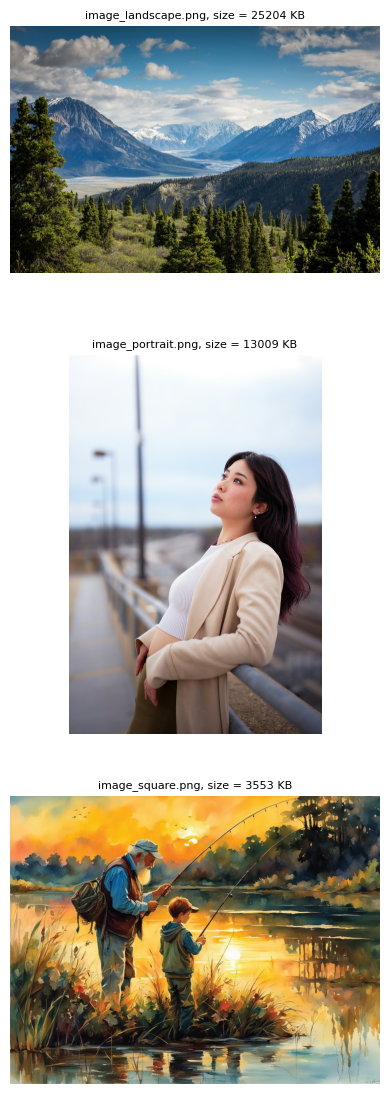

In [14]:

images = [f for f in os.listdir(original_folder) if f.lower().endswith(('.png'))]
images.sort()

fig, ax = plt.subplots(len(images), 1, figsize=(4, 4*len(images)), tight_layout=True)

if len(images) == 1:
    ax = [ax]

for i, image_name in enumerate(images):
    path = os.path.join(original_folder, image_name)
    image = Image.open(path)
    file_size = os.path.getsize(path) / 1024
    ax[i].imshow(image)
    ax[i].axis("off")
    ax[i].set_title(f"{image_name}, size = {round(file_size)} KB", fontsize=8)

plt.show()

_5. Defining `construct` function:_ Constructs an image by mapping labels to their corresponding centroids.

In [15]:
def construct(labels: np.ndarray, centroids:np.ndarray):

    """
    Constructs an image by mapping labels to their corresponding centroids.
    
    Parameters:
    -----------
    labels : np.ndarray
        An array of integer labels where each label corresponds to a centroid index.
        The shape of this array should typically be (height, width) for image applications.
    
    centroids : np.ndarray
        An array of centroids where each row corresponds to a centroid.
        The shape of this array is (n_centroids, n_features), where n_features could be
        the number of color channels in the case of images (e.g., 3 for RGB).
    
    Returns:
    --------
    image_transformed : np.ndarray
        The constructed image where each label in the input `labels` array is replaced by the 
        corresponding centroid. The shape of this array will be (height, width, n_features).
    """

    image_transformed = centroids[labels, :]
    
    return image_transformed

_6. Defining `transform` function: Applies K-means clustering to transform an image array into cluster labels and centroids._ 

In [16]:
def transform(image_array:np.ndarray, k:int, iters: int):
    """
    Applies K-means clustering to transform an image array into cluster labels and centroids.
    
    Parameters:
    -----------
    image_array : np.ndarray
        A 2D array where each row is a pixel and each column is a color channel. 
        Typically, the shape is (num_pixels, num_channels), where num_channels is usually 3 for RGB images.
    
    k : int
        The number of clusters (k) to form as well as the number of centroids to generate.
    
    iters : int
        The maximum number of iterations for the K-means algorithm.
    
    Returns:
    --------
    labels : np.ndarray
        An array of cluster labels assigned to each pixel. The shape is (num_pixels,).
    
    centroids : np.ndarray
        An array of the cluster centroids. The shape is (k, num_channels).

    """
    km_picture = MiniBatchKMeans(n_clusters=k, max_iter=max_iters)
    labels = km_picture.fit_predict(image_array)
    centroids = km_picture.cluster_centers_
    
    return labels, centroids

_7. Executing K-means on images present in `test_pictures` folder. <br>
    Also uses module: `time` to find <u> execution time</u> for each picture._ 

In [17]:
import time
images_opened = [Image.open('test_pictures/'+ i) for i in images] #opening images using PIL.Image class
original_sizes = []
images_transformed = []
labels_image = []
centroids_image = []
for i, image in enumerate(images_opened):
    start_time = time.time() #time at the start of the process
    print(f'constructing image: {images[i]}')

    array = np.array(image)/255 #normalising the RGB values of a pixel in the image
    image_reshaped = array.reshape(array.shape[0]* array.shape[1], array.shape[2]) #reshaping image array into a 2D matrix to apply K-means
    original_sizes.append(array.shape) #storing the shape of original image for reconstruction
    labels, colors = transform(image_reshaped, k, max_iters)
    labels_image.append(labels) #storing the labels for reconstruction
    centroids_image.append(colors) #storing the colors/centroids for reconstruction
    image_constructed = construct(labels, colors) 

    end_time = time.time() #time at the completion of process
    print(f'image: {images[i]} has been transformed. time taken = {round((end_time- start_time), 1)}s\n')
    images_transformed.append(image_constructed.reshape(original_sizes[i]))
    

constructing image: image_landscape.png


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


image: image_landscape.png has been transformed. time taken = 97.5s

constructing image: image_portrait.png


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


image: image_portrait.png has been transformed. time taken = 124.2s

constructing image: image_square.png


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


image: image_square.png has been transformed. time taken = 16.0s



_8. Save the results of a K-means clustering transformation of images to a PNG format._

In [18]:
import png
for i in range(len(images)):
    rows, cols = original_sizes[i][0], original_sizes[i][1]
    labels_reshaped = labels_image[i].reshape(rows, cols)
    s = []
    for j in range(rows):
        s.append(tuple(labels_reshaped[j].astype(int)))
    centroids = centroids_image[i]
    rgb_palette = list(tuple(k) for k in (centroids*255).astype(int))
    w = png.Writer(width=cols, height=rows, palette=rgb_palette, bitdepth=8)
    path = 'compressed_outputs/'+ images[i]
    f = open(path, 'wb')
    w.write(f, s)
    f.close()

_9. Store the `name` and `file sizes` of compressed images produced._

In [19]:
compressed_datasizes = []
compressed_images = []
for i in os.listdir('compressed_outputs'):
    compressed_images.append(i)
    compressed_datasizes.append(os.path.getsize('compressed_outputs/'+ i))

_10. Display the original, uncompressed images with their compressed counterparts side by side using `Matplotlib`_

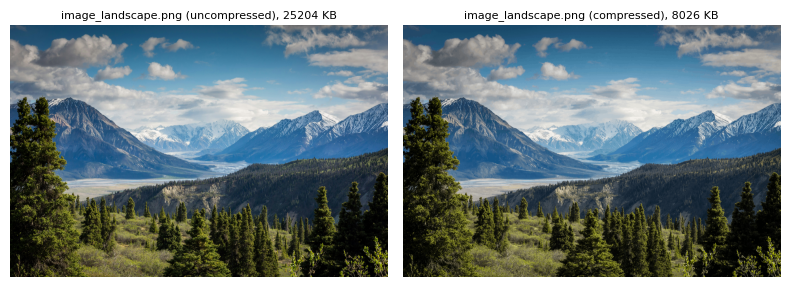

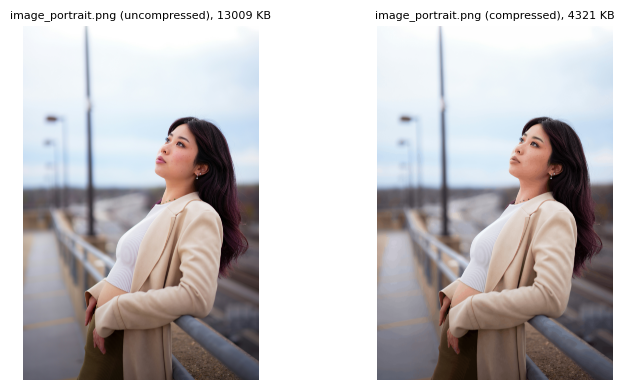

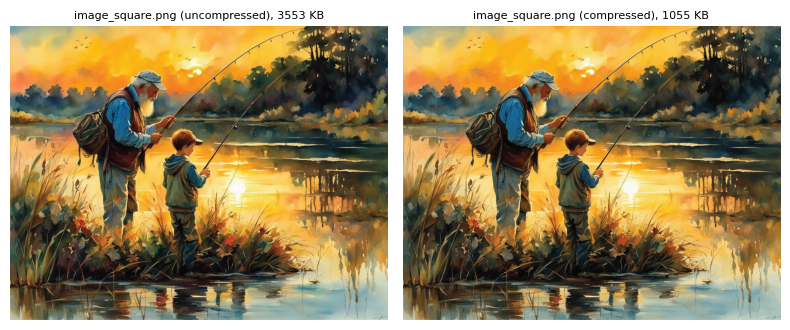

In [20]:
# Get all image filenames (only PNGs)
images = sorted([f for f in os.listdir(original_folder) if f.lower().endswith('.png')])
images = [f for f in images if os.path.exists(os.path.join(compressed_folder, f))]  # only keep files that exist in both

for image_name in images:
    original_image = Image.open(os.path.join(original_folder, image_name))
    compressed_image = Image.open(os.path.join(compressed_folder, image_name))

    original_size = os.path.getsize(os.path.join(original_folder, image_name)) / 1024
    compressed_size = os.path.getsize(os.path.join(compressed_folder, image_name)) / 1024

    fig, ax = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
    
    ax[0].imshow(original_image)
    ax[0].set_title(f'{image_name} (uncompressed), {round(original_size)} KB', fontsize=8)
    ax[0].axis('off')

    ax[1].imshow(compressed_image)
    ax[1].set_title(f'{image_name} (compressed), {round(compressed_size)} KB', fontsize=8)
    ax[1].axis('off')

    plt.show()

_11. Calculate `percentage reduction` in file size due to compression._

In [21]:
for i in range(len(images)):
    print(f'compression rate obtained for {images[i]}: {round((original_datasizes[i] - compressed_datasizes[i])*100/original_datasizes[i], 2)}%')

compression rate obtained for image_landscape.png: 68.16%
compression rate obtained for image_portrait.png: 66.79%
compression rate obtained for image_square.png: 70.3%
